In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

# Lecture 29

### Simulate the Number of Heads in 100 Tosses

In [3]:
coin = make_array('H', 'T')
num_tosses = 100

In [4]:
def one_simulated_count():
    tosses = np.random.choice(coin, num_tosses)
    return sum(tosses == 'H')

In [5]:
num_repetitions = 10000
counts = make_array()
for i in np.arange(num_repetitions):
    counts = np.append(counts, one_simulated_count())

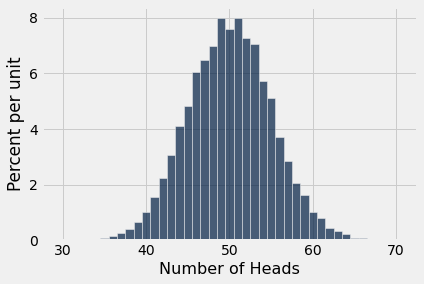

In [6]:
Table().with_columns(
    'Number of Heads', counts).hist(bins=np.arange(29.5, 70.6, 1))

## Approach to Prediction

In [7]:
family_heights = Table.read_table('family_heights.csv').drop(3)
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


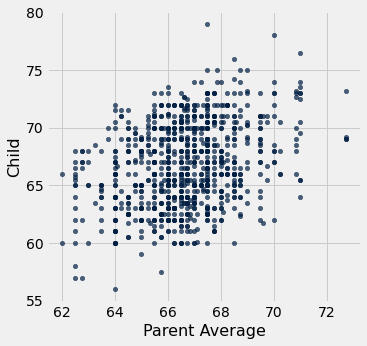

In [8]:
heights.scatter('Parent Average')

In [9]:
def predict_child(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child'))  

In [10]:
heights_with_predictions = heights.with_columns(
    'Prediction', heights.apply(predict_child, 'Parent Average'))

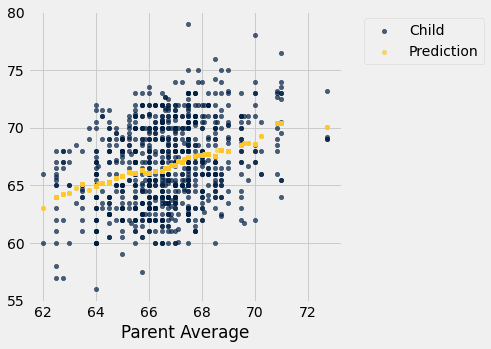

In [11]:
heights_with_predictions.scatter('Parent Average')

## Association

In [12]:
hybrid = Table.read_table('hybrid.csv')

In [13]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [14]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


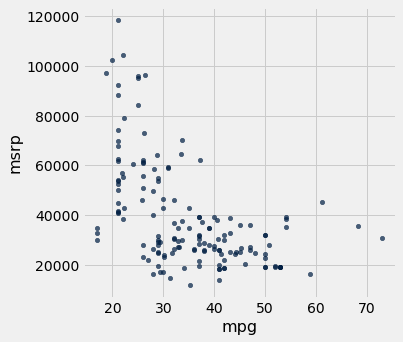

In [15]:
hybrid.scatter('mpg', 'msrp')

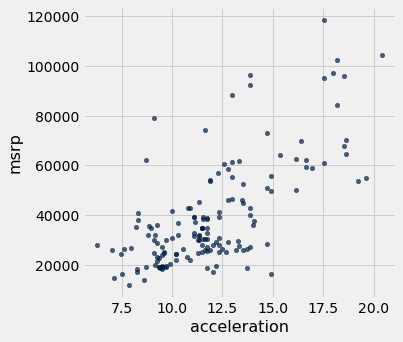

In [16]:
hybrid.scatter('acceleration', 'msrp')

In [17]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

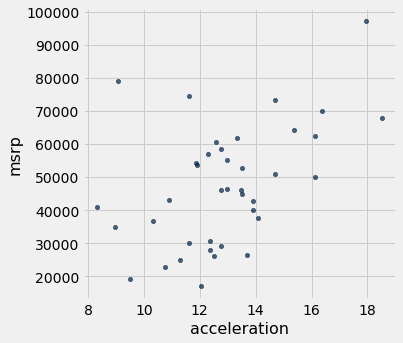

In [18]:
suv.scatter('acceleration', 'msrp')

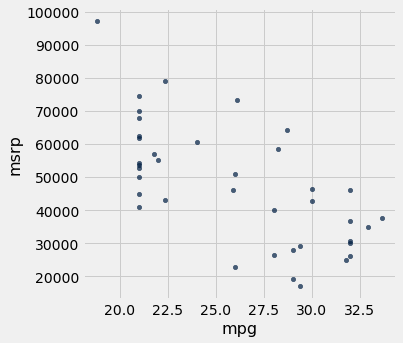

In [19]:
suv.scatter('mpg', 'msrp')

In [20]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

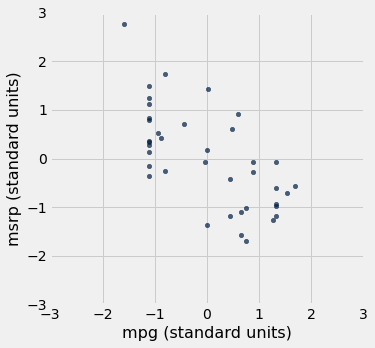

In [21]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

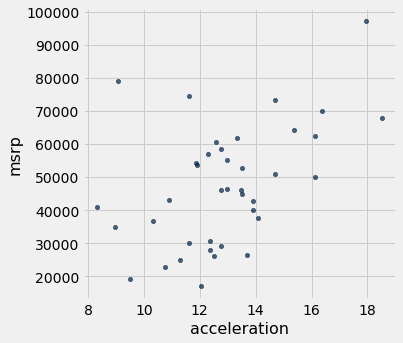

In [22]:
suv.scatter('acceleration', 'msrp')

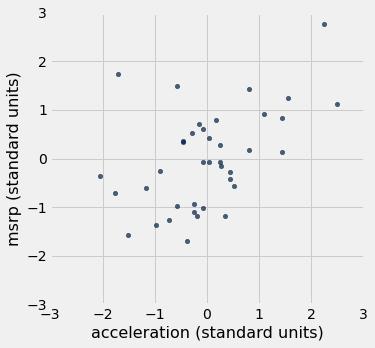

In [23]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Correlation

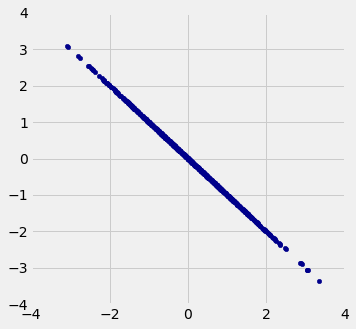

In [24]:
r_scatter(-1)

In [25]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


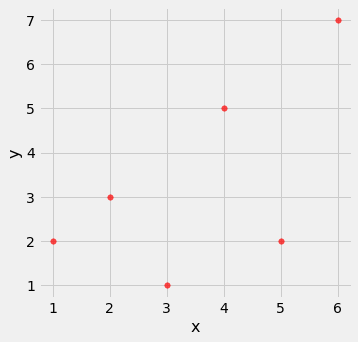

In [26]:
t.scatter('x', 'y', s=30, color='red')

In [27]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


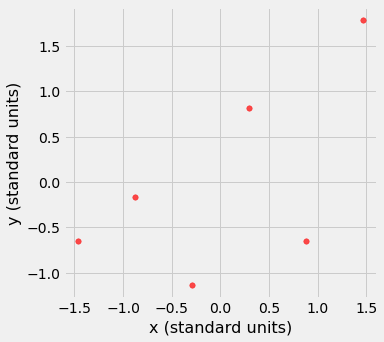

In [28]:
t.scatter(2, 3, s=30, color='red')

In [29]:
t = t.with_columns(
    'product of standard units', t.column(2) * t.column(3))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [30]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

0.61741639718977093

In [31]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [32]:
correlation(t, 'x', 'y')

0.61741639718977093

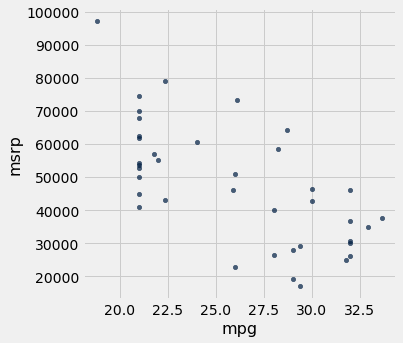

In [33]:
suv.scatter('mpg', 'msrp')

In [34]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

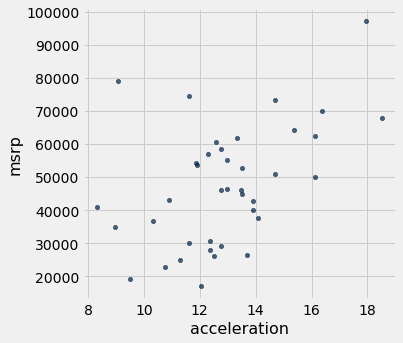

In [35]:
suv.scatter('acceleration', 'msrp')

In [36]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

### Switching Axes

In [37]:
correlation(t, 'x', 'y')

0.61741639718977093

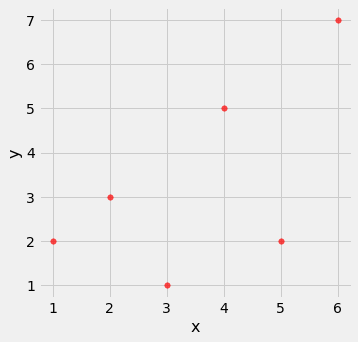

In [38]:
t.scatter('x', 'y', s=30, color='red')

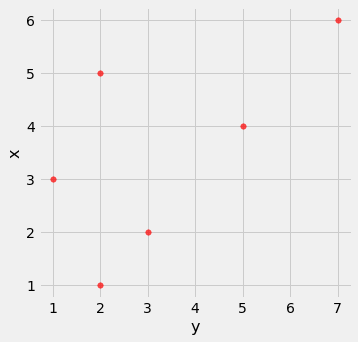

In [39]:
t.scatter('y', 'x', s=30, color='red')

In [40]:
correlation(t, 'y', 'x')

0.61741639718977093

### Nonlinearity

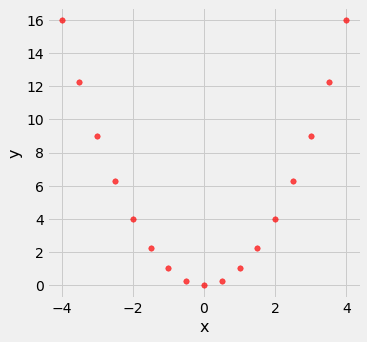

In [41]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [42]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers

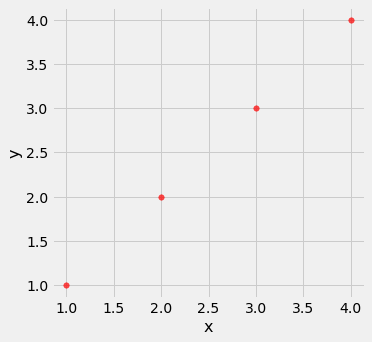

In [43]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [44]:
correlation(line, 'x', 'y')

1.0

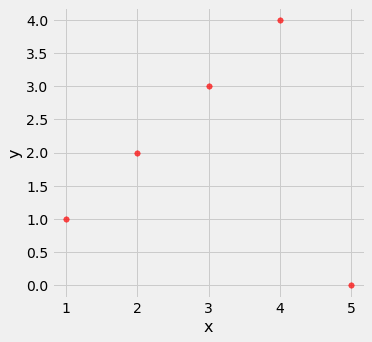

In [45]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [46]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations

In [47]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


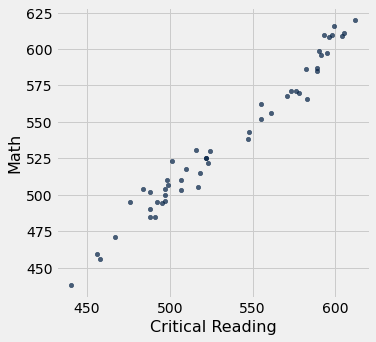

In [48]:
sat2014.scatter('Critical Reading', 'Math')

In [49]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341